In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize

### 1.1

In [2]:
# Se cargan los datos
df = pd.read_csv('fit_curve.csv') 
df

Unnamed: 0  x    y
0           0  0  0.0
1           1  1  1.3
2           2  2  2.6
3           3  3  3.9
4           4  4  5.2
5           5  5  6.5
6           6  6  5.8
7           7  7  5.1
8           8  8  4.4
9           9  9  3.7

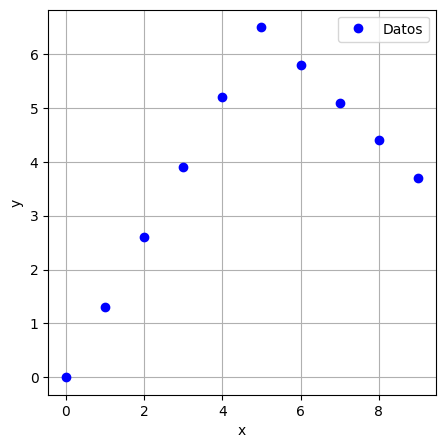

In [7]:
#grafiquemos los datos
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df["x"], df["y"], 'bo', label='Datos') 
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

In [20]:
#procedamos a ajustar los datos a través de una funció cuadrática

def func(x, param):
    return param[0]*x**2 + param[1]*x + param[2] #Los parámetros 0,1 y 2 corresponden a constantes en la ecuación cuadrática

In [23]:
#Ajuste con Chi**2
def chicuadrado(param):
    return np.sum(np.square(df["y"]-func(df["x"],param)))

result = minimize(chicuadrado, [1,1,1]) #minimizando
print(f"parametros con optimización = {result.x}" )
print(f"Chi**2 = {chicuadrado(result.x)}")

parametros con optimización = [-0.18939412  2.15606222 -0.45454755]
Chi**2 = 1.666666666684179


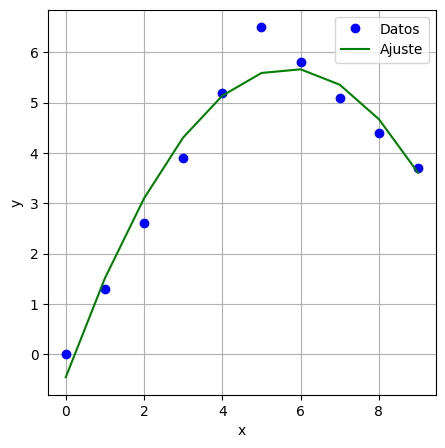

In [24]:
#Gráfica con ajuste cuadráticos
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df["x"], df["y"], 'bo', label='Datos')
plt.plot(df["x"], func(df["x"], result.x), 'g-', label='Ajuste')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

In [31]:
#Consideremos ahora la siguiente funcion de ajuste
def gauss(x,param): #funcion gaussiana
    return param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2)

In [32]:
#Similarmente ajustemos con chi**2
#aqui: param[0] es la norma
#param [1] es mu
#param [2] es sigma
def chicuadrado(param): 
    return np.sum(np.square(df["y"]-gauss(df["x"],param)))

result = minimize(chicuadrado, [1,1,1]) #minimizando
print(f"parametros con optimización = {result.x}")
print(f"Chi**2 = {chicuadrado(result.x)}")

parametros con optimización = [6.19486322 5.74654926 1.9677472 ]
Chi**2 = 1.58176027764944


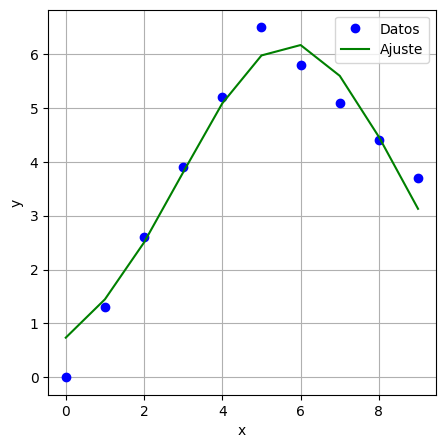

In [33]:
#Gráfica con ajuste de la funcion gauss
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df["x"], df["y"], 'bo', label='Datos')
plt.plot(df["x"], gauss(df["x"], result.x), 'g-', label='Ajuste')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

In [35]:
#Consideremos ahora una función más general con los mismos parametros justamente anteriores
#se añade otro parametro: param[3]
def gaussgeneral(x,param):
    return x + param[3] + param[0]*np.exp(-(x-param[1])**2/(2*param[2])**2)

In [36]:
#Similarmente ajustemos con chi**2
def chicuadrado(param):
    return np.sum(np.square(df["y"]-gaussgeneral(df["x"],param)))

result = minimize(chicuadrado, [1,1,1,1])
print(f"parametros con optimización = {result.x}")
print(f"Chi**2 = {chicuadrado(result.x)}")

parametros con optimización = [ 559.92935214    3.05238318   27.10879262 -558.61610274]
Chi**2 = 1.6702700049028834


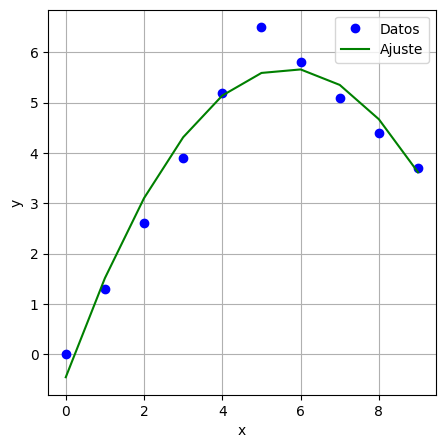

In [37]:
#Gráfica con ajuste de la funcion gauss
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(df["x"], df["y"], 'bo', label='Datos')
plt.plot(df["x"], gaussgeneral(df["x"], result.x), 'g-', label='Ajuste')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.legend()
ax.grid()

### 1.2

In [38]:
#Carguemos los datos para este item
df2 = pd.read_csv('auto.csv')
df2.head()


Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

In [39]:
df2.sort_values(by=["horsepower"], ascending=True, inplace=True) #ordenando de menor a mayor
df2.head()

Unnamed: 0  symboling  normalized-losses        make aspiration  \
17           17          2                121   chevrolet        std   
178         178          2                122  volkswagen        std   
180         180          2                 94  volkswagen        std   
87           87          1                128      nissan        std   
155         155          0                 91      toyota        std   

    num-of-doors body-style drive-wheels engine-location  wheel-base  ...  \
17           two  hatchback          fwd           front        88.4  ...   
178          two      sedan          fwd           front        97.3  ...   
180         four      sedan          fwd           front        97.3  ...   
87           two      sedan          fwd           front        94.5  ...   
155         four  hatchback          fwd           front        95.7  ...   

     compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg   price  \
17                 9.5        48.0    5100.0        47          53  5151.0   
178               23.0        52.0    4800.0        37          46  7775.0   
180               23.0        52.0    4800.0        37          46  7995.0   
87                21.9        55.0    4800.0        45          50  7099.0   
155               22.5        56.0    4500.0        38          47  7788.0   

     city-L/100km horsepower-binned  diesel  gas  
17       5.000000               Low       0    1  
178      6.351351               Low       1    0  
180      6.351351               Low       1    0  
87       5.222222               Low       1    0  
155      6.184211               Low       1    0  

[5 rows x 30 columns]

Text(0.5, 1.0, 'Precio vs Caballos de Potencia')

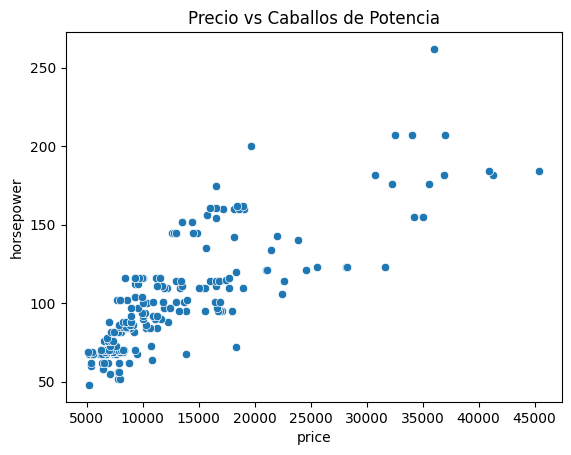

In [101]:
import seaborn as sns
sns.scatterplot(df2, x='price', y='horsepower', hue=None)
plt.title('Precio vs Caballos de Potencia')

### La figura anterior muestra que a medida que los caballos de potencia crecen, también lo hace  los precios. Llamamos a esta relación asociación positiva. La relación entre los valores en "x" (Caballos de Potencia)  y  "y" (precios) no es tan notoriamente lineal porque todos los puntos se sitúan alrededor sobre de una línea recta (puntos un poco dispersos). Esta relación indica que a medida que la potencia aumenta, también lo hacen los precios. 

In [50]:
df2["price"].max()

45400.0

In [51]:
df2["horsepower"].max()

262.0

### Nótese que el valor más alto de precio se da para un valor de potencia de 262HP

/tmp/ipykernel_13636/1408448674.py:4: MatplotlibDeprecationWarning: Passing the emit parameter of set_xlim() positionally is deprecated since Matplotlib 3.6; the parameter will become keyword-only two minor releases later.
  plt.xlim(0,50000,2)


Text(0, 0.5, 'Frecuencia')

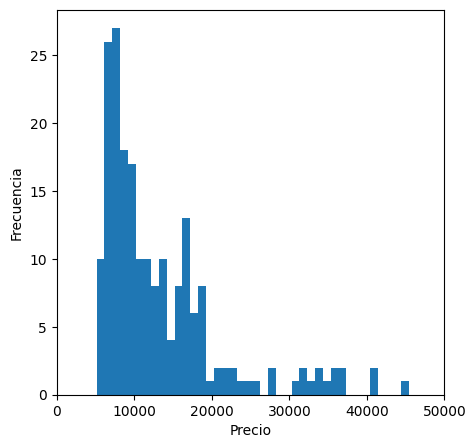

In [91]:
plt.figure(figsize=(5, 5))
hist = plt.hist(x = df2['price'], bins=40)
plt.xlabel("Precio")
plt.xlim(0,50000,2)
plt.ylabel("Frecuencia")

### Nótese que el precio más común o de mayr frecuencia se acerca al valor de los diez mil. Otro precio que también tiene una frecuencia considerable es el cercano a los 17mil aproximandamente.

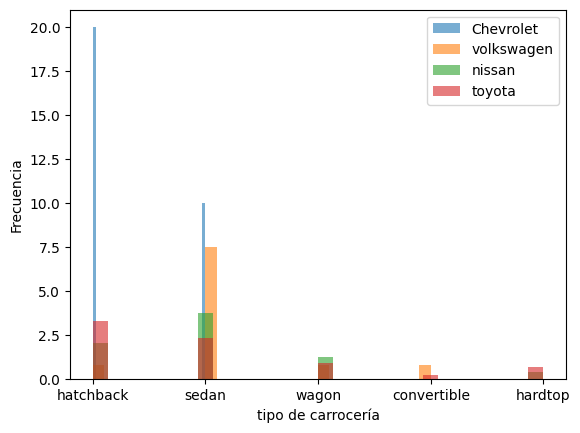

In [90]:

column = 'price'
mask_chevrolet = df2['make'] == 'chevrolet'
body_style = df2['body-style']
body_style_chevrolet = body_style[mask_chevrolet]

mask_volkswagen = df2['make'] == 'volkswagen'
body_style = df2['body-style']
body_style_volkswagen = body_style[mask_volkswagen]

mask_nissan = df2['make'] == 'nissan'
body_style = df2['body-style']
body_style_nissan = body_style[mask_nissan]


mask_toyota = df2['make'] == 'toyota'
body_style = df2['body-style']
body_style_toyota = body_style[mask_toyota]


plt.hist(body_style_chevrolet, label='Chevrolet', bins = 30,density=True, alpha=0.6)
plt.hist(body_style_volkswagen, label='volkswagen', bins = 30, density=True, alpha=0.6)
plt.hist(body_style_nissan, label='nissan', bins = 30, density=True, alpha=0.6)
plt.hist(body_style_toyota, label='toyota', bins = 30, density=True, alpha=0.6)
plt.xlabel("tipo de carrocería")
plt.ylabel("Frecuencia")
plt.legend()

### Del gráfico anterior se puede ver claramnete como los carros de tipo "Hatchback" son en su mayoría de marca Chevrolet (20 autos). Otros que cuentan con una frecuencia alta pero no mayor a la anterior son los de tipo "sedan" o carrocería de turismo son los correspondientes a los de marca volkswagen

/tmp/ipykernel_13636/1577403568.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'chevrolet'),
 Text(1, 0, 'volkswagen'),
 Text(2, 0, 'nissan'),
 Text(3, 0, 'toyota'),
 Text(4, 0, 'honda'),
 Text(5, 0, 'mazda'),
 Text(6, 0, 'mitsubishi'),
 Text(7, 0, 'plymouth'),
 Text(8, 0, 'dodge'),
 Text(9, 0, 'subaru'),
 Text(10, 0, 'isuzu'),
 Text(11, 0, 'peugot'),
 Text(12, 0, 'bmw'),
 Text(13, 0, 'audi'),
 Text(14, 0, 'renault'),
 Text(15, 0, 'volvo'),
 Text(16, 0, 'saab'),
 Text(17, 0, 'alfa-romero'),
 Text(18, 0, 'mercedes-benz'),
 Text(19, 0, 'porsche'),
 Text(20, 0, 'mercury'),
 Text(21, 0, 'jaguar')]

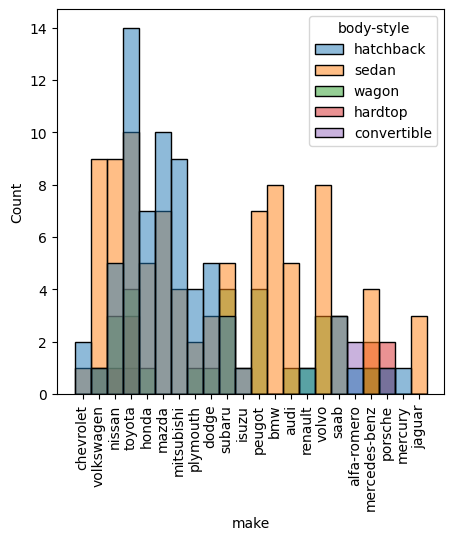

In [89]:
fig, ax = plt.subplots(figsize=(5, 5))
sns.histplot(data=df2, x='make', hue='body-style', bins=30)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### En este gráfico se logra ver los de tipo "hatchback" para los toyota son los que cuentan con una mayor frecuencia. Los de tipo Sedan son muy frecuentes para las marcas Volkswagen, bmw, volvo, etc...

/tmp/ipykernel_13636/360617190.py:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)


[Text(0, 0, 'alfa-romero'),
 Text(1, 0, 'audi'),
 Text(2, 0, 'bmw'),
 Text(3, 0, 'chevrolet'),
 Text(4, 0, 'dodge'),
 Text(5, 0, 'honda'),
 Text(6, 0, 'isuzu'),
 Text(7, 0, 'jaguar'),
 Text(8, 0, 'mazda'),
 Text(9, 0, 'mercedes-benz'),
 Text(10, 0, 'mercury'),
 Text(11, 0, 'mitsubishi'),
 Text(12, 0, 'nissan'),
 Text(13, 0, 'peugot'),
 Text(14, 0, 'plymouth'),
 Text(15, 0, 'porsche'),
 Text(16, 0, 'renault'),
 Text(17, 0, 'saab'),
 Text(18, 0, 'subaru'),
 Text(19, 0, 'toyota'),
 Text(20, 0, 'volkswagen'),
 Text(21, 0, 'volvo')]

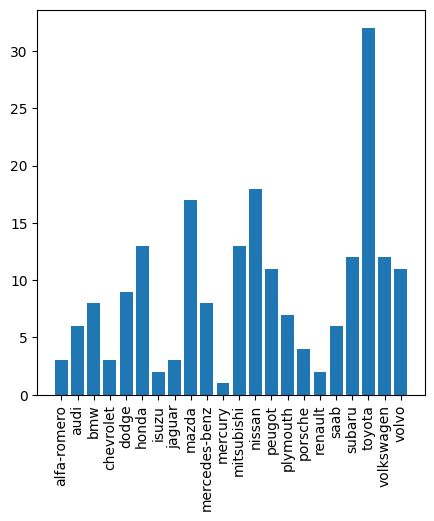

In [94]:
fig, ax = plt.subplots(figsize=(5, 5))
x, y = np.unique(df2['make'], return_counts=True)
ax.bar(x, y)
ax.set_xticklabels(ax.get_xticklabels(),rotation = 90)

### Los carros con mayor frecuencia, efectivamente son los toyota seguido de los Nissan. Veamos si guardan relación con los precios

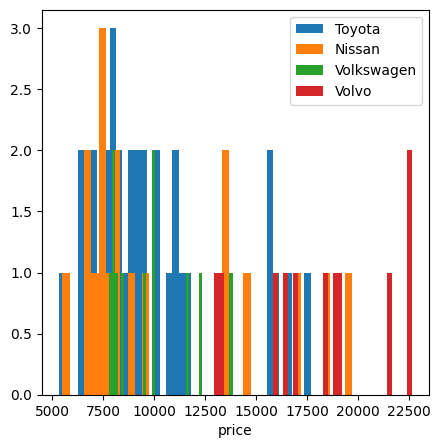

In [100]:
column = 'price'

mask_toyota = df2['make'] == 'toyota'
marca_toyota = df2[column][mask_toyota]

mask_nissan = df2['make'] == 'nissan'
marca_nissan = df2[column][mask_nissan]

mask_volkswagen = df2['make'] == 'volkswagen'
marca_volkswagen = df2[column][mask_volkswagen]

mask_volvo = df2['make'] == 'volvo'
marca_volvo = df2[column][mask_volvo]

fig, ax = plt.subplots(figsize=(5, 5))
plt.hist(marca_toyota, bins = 40, label = 'Toyota');
plt.hist(marca_nissan, bins = 40, label = 'Nissan');
plt.hist(marca_volkswagen, bins = 40, label = 'Volkswagen');
plt.hist(marca_volvo, bins = 40, label = 'Volvo');
plt.xlabel(column)

plt.legend()

### Nótese que si compiten en precio son los Nissan y los Toyota comparado por ejemplo con los Volvo. Con lo cuál si se deja como evidencia que la mayor frecuencia está relacionado con el precio de los autos; por eso el la frecuencias en el grafico de frecuencias para los tipos de autos. 

##  Pequeño informe

/tmp/ipykernel_13636/81962761.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)


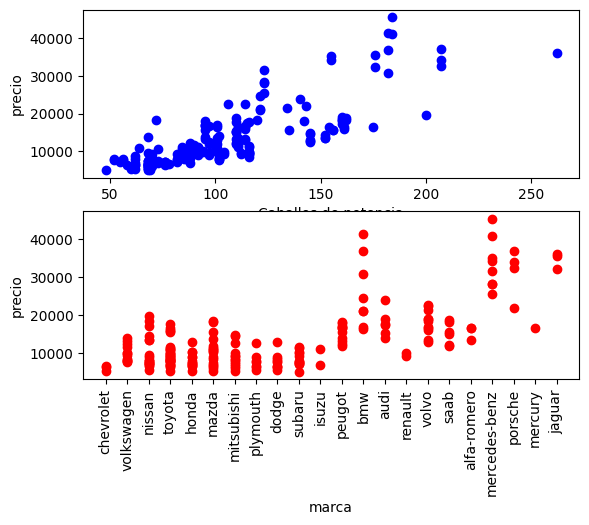

In [120]:
fig, (ax1,ax2) = plt.subplots(2)
ax1.plot(df2['horsepower'], df2['price'], 'bo', label='Datos')
ax2.plot(df2['make'], df2['price'], 'ro', label='Datos')
ax1.set_xlabel('Caballos de potencia')
ax1.set_ylabel('precio')
ax2.set_xlabel('marca')
ax2.set_ylabel('precio')
#ax1.set_xticklabels(ax1.get_xticklabels(),rotation = 90)
ax2.set_xticklabels(ax2.get_xticklabels(),rotation = 90)
plt.show()

# $\blacksquare$ informe:

28 de mayo de 2023


Tengan un cordial saludo,

Se adjunta informe respecto a ciertas variables relacionadas; a continuación se especifica:

El gráfico anterior muestra una relación entre el precio entre los caballos de potencia y el precio y la marca del vehículo. Estas son las variables que se consideran para el informe. 


1. Caballos de Potecnia vs Precio:
   La relación que guardan los caballos de potecia en un automovil respecto a su precio es importante; pues estas variables están relacionadas directamente debido a que la inversión económica que se requiere es mayor. Los vehículos con mayor potencia (HP) requieren de una mayor infraestructura en sus equipo, lo cual eleva significativamente su valor comercial si lo que se busca por ejemplo es una mayor velocidad o fuerza en el auto. Los automóviles con tecnologías avanzadas y características de alta gama tienden a tener precios más altos. Esto incluye por ejemplo para la obteción de mayor potencia en el auto, materiales de alta calidad para el desarrollo del motor, sensores altamente sensibles; etc. Los puntos azules del gráfico anterior  muestra que que a medida que los caballos de potencia crecen (eje x), también lo hace  los precios (eje y). Llamamos a esta relación asociación positiva. La relación entre los valores en "x" (Caballos de Potencia)  y  "y" (precios) se sitúan alrededor sobre de una línea recta (puntos un poco dispersos), lo cual deja como evidencia esta relacion lineal. Esta relación indica que a medida que la potencia aumenta, también lo hacen los precios. Este gráfico también puede dar indicios de los vehículos que compiten a nivel de ifraestructura en el mercado.


2. Marca del auto vs Precio:
   El precio de un automóvil está fuertemente influenciado por la marca a la que pertenece. La marca de un auto puede transmitir una serie de características y atributos que afectan su valor percibido en el mercado. A Veamos algunos factres clave relacionados con la marca y su impacto en el precio de un automóvil:
   - Prestigio y reputación
   - Innovación y tecnología
   - Exclusividad y demanda
   - etc...

   Como se acaba de ver, estos factores pueden variar a través del tiempo e influencias considerablemnte en el precio comercial para un automóvil. Cómo se logra apreciar en los puntos rojos del gráfico anterior, se pude decir que los precios más elevados están relacionado con los autos BMW y Mercedes-Benz. Lo cuál se puede inferir que estos autos cuentan con una infraestructura más sofisticada en cuanto a tecnología. Tamién se puede apreciar en este mismo gráfico que los autos con más demanda son los que se pueden considerar "de menos gama" como los Mazda o Nissan por ejemplo. Esto se hace evidente en el día a día, pues son los que se suelen ver con mayor frecuencia en las calles también debido a su relación con el costo. A partir de esto se podría profundizar en un futuro, la emisión que pueden generar estos vehículos en el medio ambiente; pues como se dijo anteriormente son los que más espacio ocupan en la vías; con lo cual se pueden encontrar indicios de las emisiones o contaminantes más comunes en el medio ambiente debido a los mismos.
